<a href="https://colab.research.google.com/github/rukka0808/Machine-Learning-Study/blob/main/Seoul_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.mount

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!ls -al 'drive/MyDrive/data'

total 2268857
-rw------- 1 root root    337847 Jun 18 04:24 data_202001.csv
-rw------- 1 root root    314682 Jun 18 04:24 data_202002.csv
-rw------- 1 root root    335953 Jun 18 04:24 data_202003.csv
-rw------- 1 root root   4052564 Jun 18 04:24 data_2020.csv
-rw------- 1 root root    337176 Jun 25 03:40 output.csv
-rw------- 1 root root 757939580 Feb 14 23:37 TCS_11_03_02_339640.csv
-rw------- 1 root root 732586920 Mar 14 23:42 TCS_11_03_02_663167.csv
-rw------- 1 root root 827403150 Apr 14 23:36 TCS_11_03_02_717062.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Load data

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
file = "drive/MyDrive/data/data_2020.csv"
data = pd.read_csv(file)
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


도착 영업소코드를 서울에서 해당 목적지 까지의 거리로 바꿔줌

In [6]:
data['도착영업소코드'] = data['도착영업소코드'].map({105: 20, 110: 77, 115: 135, 120: 185, 125: 240, 130: 215, 135: 339, 140: 407})

In [7]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [8]:
data.rename(columns={'도착영업소코드': '거리'}, inplace=True)

In [9]:
data.head()

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [10]:
import tensorflow as tf
import numpy as np

In [11]:
Selected_Date = '2020-01-10' #@param {type:"date"}
input_date = int(Selected_Date.replace('-',''))
print(input_date)

20200110


In [12]:
data_date = data[data['집계일자'] == input_date]

In [13]:
data_time = data_date.groupby(['집계일자','거리'])['통행시간'].mean()
data_time

집계일자      거리 
20200110  20       880.007353
          77      3545.876190
          135     5816.191781
          185     8557.842105
          215     9592.600000
          240     9795.133333
          339    14371.681818
          407    15032.960000
Name: 통행시간, dtype: float64

In [14]:
data_out = data_time.reset_index()

In [15]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000


In [17]:
data_list = data_out.values.tolist()
data_list[:4]

[[20200110.0, 20.0, 880.0073529411765],
 [20200110.0, 77.0, 3545.8761904761905],
 [20200110.0, 135.0, 5816.191780821918],
 [20200110.0, 185.0, 8557.842105263158]]

In [18]:
x_train = [ int(r[1]) for r in data_list ]
y_train = [ int(r[2]/10) for r in data_list]

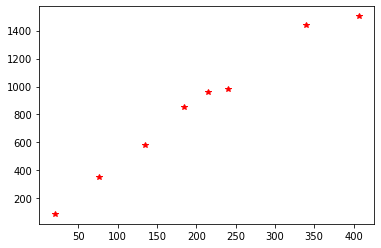

In [19]:
plt.plot(x_train, y_train, 'r*')

In [20]:
learning_rate = 1e-8
learning_epochs = 2000

In [21]:
# Stochastic gradient descent (SGD) Optimizer
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
# Mean Square Error (MSE) loss function
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

model.compile(loss=mse, optimizer=sgd)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Train the model
history = model.fit(x_train, y_train, epochs=learning_epochs)

Epoch 1/2000
1/1 [==============================] - 1s 532ms/step - loss: 754840.8750
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 753182.2500
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 751527.1875
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 749875.7500
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 748228.0000
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 746584.0000
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 744943.5000
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 743306.7500
Epoch 9/2000
1/1 [==============================] - 0s 3ms/step - loss: 741673.5625
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 740044.0625
Epoch 11/2000
1/1 [==============================] - 0s 3ms/step - loss: 738418.0625
Epoch 12/2000
1/1 [==============================] - 0s 6ms/step - loss:

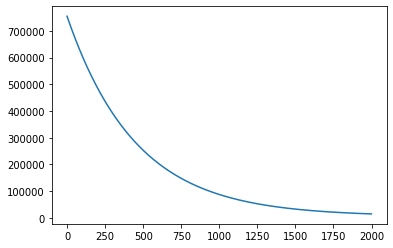

In [24]:
plt.plot(history.history['loss'])
plt.show()

In [27]:
Distance = 441 #@param {type:"slider", min:0, max:500, step:1}
input_data = [Distance]
predicted_value = model.predict(input_data)

print('%3d km takes %5.1f seconds on %s' %(Distance, predicted_value[0][0]*10, Selected_Date))

500 km takes 18369.0 seconds on 2020-01-10


In [26]:
data_out

,집계일자,거리,통행시간
0,20200110,20,880.007353
1,20200110,77,3545.876190
2,20200110,135,5816.191781
3,20200110,185,8557.842105
4,20200110,215,9592.600000
5,20200110,240,9795.133333
6,20200110,339,14371.681818
7,20200110,407,15032.960000
